<a href="https://colab.research.google.com/github/KellyPared/deep-learning-challenge/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# 

In [ ]:
#Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [ ]:
#there is a fairly equal amount of is successful
application_df['IS_SUCCESSFUL'].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

Goal: "Wants a tool that can help it select the applicants for funding with the best chance of success.."

*   What variable(s) are the target(s) for your model?
*   What variable(s) are the feature(s) for your model?


### Target Variable is "Is Successful"
### The other variables(Except EIN and NAME) are the features.


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)



In [ ]:
# calculate the number of unique values for each column
for col in application_df.columns:
    unique_vals = application_df[col].nunique()
    #print(f"{col}: {unique_vals}")
    print("{:<23}: {}".format(col, unique_vals))



APPLICATION_TYPE       : 17
AFFILIATION            : 6
CLASSIFICATION         : 71
USE_CASE               : 5
ORGANIZATION           : 4
STATUS                 : 2
INCOME_AMT             : 9
SPECIAL_CONSIDERATIONS : 2
ASK_AMT                : 8747
IS_SUCCESSFUL          : 2


In [ ]:
# Look at APPLICATION_TYPE value counts for binning
# In ml, this column can be used as a feature to predict whether an organization will be successful in receiving funding.
app_counts = application_df['APPLICATION_TYPE'].value_counts()
print(app_counts)


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [ ]:
# calculate the number of unique values for each column
for col in application_df.columns:
    unique_vals = application_df[col].nunique()

    #For columns that have more than 10 unique values, determine the number of data points for each unique value.
    #anything else. just print
    
    if unique_vals > 10:
        print("Unique values for column '{}' (total: {}):".format(col, unique_vals))
        print(application_df[col].value_counts())
        print(" ")

    else:
        print("Unique Values less than 10")
        print("{:<23}: {}".format(col, unique_vals))
        print(" ")

Unique values for column 'APPLICATION_TYPE' (total: 17):
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
 
Unique Values less than 10
AFFILIATION            : 6
 
Unique values for column 'CLASSIFICATION' (total: 71):
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
 
Unique Values less than 10
USE_CASE               : 5
 
Unique Values less than 10
ORGANIZATION           : 4
 
Unique Values less than 10
STATUS                 : 2
 
Unique Values less than 10
INCOME_AMT             : 9
 
Unique Values less than 10
SPECIAL_CONSIDERATIONS : 2
 
Unique values for column 'ASK_AMT' (total: 8747):
5000        25398
10478     

There are 17 different T types of the application type; T-codes might correspond to different types of activities that the organization performs, such as training and technical assistance, consulting, research and evaluation, information dissemination


Choose a cutoff value that captures the majority of the variation in the data while still allowing you to bin the less common values into a single category.

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# The items below 500 are less frequent
#A good rule of thumb is to choose a cutoff value that reduces the number 
# of unique values in the column to a manageable number
cutoff = 500

type_counts = application_df["APPLICATION_TYPE"].value_counts()

# application types less frequently than the cutoff
application_types_to_replace = list(type_counts[type_counts < cutoff].index)

print(application_types_to_replace)


['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']


In [ ]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

This information is important because it can help us to decide how to handle infrequent values in the CLASSIFICATION column. One common approach is to bin the infrequent values together into a single category. This can help to reduce the dimensionality of the data and

In [ ]:
# Look at CLASSIFICATION value counts for 
#use this information to determine which values occur frequently and which values occur infrequently

classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1

classification_counts_over_1 = classification_counts[classification_counts > 1]
print(classification_counts_over_1)


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff2 = 300
# use the variable name `classifications_to_replace`
# Get the counts of each application type
class_counts = application_df['CLASSIFICATION'].value_counts()

classifications_to_replace =  list(class_counts[class_counts < cutoff2].index)

classifications_to_replace 




['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [ ]:

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
# identify the categorical columns
cat_cols = application_df.select_dtypes(include=['object']).columns
cat_cols


Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype='object')

In [ ]:
#OneHotEncoder
enc = OneHotEncoder(sparse=False)
encoded_df = pd.DataFrame(enc.fit_transform(application_df[cat_cols]))
encoded_df.columns = enc.get_feature_names_out()
encoded_df.head()

# convert the categorical columns to dummy variables
# final_df = pd.get_dummies(application_df, columns=cat_cols)

# apply one-hot encoding using pd.get_dummies
# final_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from IPython.core import application
#merge one-hot encoder and drop originals

application_df = application_df.merge(encoded_df, left_index=True, right_index =True)
application_df = application_df.drop(cat_cols,1)
application_df.head()

<ipython-input-17-fba0bef732c8>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(cat_cols,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_

In [ ]:
#Split our preproesssed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis=1).values # remove the target column
y = application_df['IS_SUCCESSFUL'].values # set the target column as the target variable

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25724, 44)
y_train shape: (25724,)
X_test shape: (8575, 44)
y_test shape: (8575,)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler

X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model
Create a neural network model by assigning the number of input features and nodes for each layer using TensorFlow and Keras.

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#Sequential = layers are stacked on top of each other in sequence
model = tf.keras.models.Sequential()

#the number of input features - this is the length of the training -pick any column
number_input_features = len(X_train_scaled[0])
print(number_input_features)

44


In [ ]:

#hidden nodes for each layer pick a random number
units_layer1 = 30
units_layer2 = 20

#the more layers - 
# First hidden layer
model.add(Dense(units=units_layer1, 
                                activation='relu', 
                                input_dim=number_input_features))

# Second hidden layer
model.add(Dense(units=units_layer2, 
                                activation='relu', 
                                input_dim=number_input_features))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1350      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,991
Trainable params: 1,991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model - 
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:

# Define the checkpoint file path
checkpoint_filepath = 'model_weights.h5'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    period=5,
    verbose=1
)

weights = model.get_weights()
for i, layer_weights in enumerate(weights):
    print(f'Layer {i} weights:')
    print(layer_weights)


# Train the model
model.fit(X_train_scaled, y_train,epochs=100,
          validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback])

Layer 0 weights:
[[ 0.25771114  0.18496674 -0.15579353 ... -0.07107361 -0.17937255
   0.1996718 ]
 [-0.07292433  0.1216557   0.09530607 ...  0.01155147  0.01945633
  -0.13254458]
 [-0.13118964  0.04693368  0.06798553 ... -0.2325356  -0.00599176
   0.21409911]
 ...
 [ 0.01372567 -0.10868219  0.20853004 ... -0.2637297  -0.11491522
  -0.25323975]
 [-0.01557893  0.24958447  0.20713273 ...  0.06100607  0.12234181
   0.23898098]
 [ 0.05410412  0.27603754  0.05135897 ...  0.228547   -0.24224204
   0.24977145]]
Layer 1 weights:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Layer 2 weights:
[[-0.31530982 -0.07072169 -0.25197917  0.17618197 -0.2151953   0.22558278
   0.223355    0.02950037  0.21674955 -0.01716077 -0.3249783  -0.2730639
   0.17504007 -0.05493036  0.17118543  0.18238604 -0.3044101   0.26369804
   0.03090492 -0.00639531]
 [-0.12541592 -0.09566206 -0.23780945  0.09924343 -0.12809375  0.13082412
  -0.00253868  0.0320887   0.33468693 -0.0

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5562 - accuracy: 0.7292 - 342ms/epoch - 1ms/step
Loss: 0.556181788444519, Accuracy: 0.7292128205299377


In [ ]:
# Export our model to HDF5 file
# save the model to an HDF5 file
model.save('AlphabetSoupCharity.h5')


# Optimizing the Model: Trial 2


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#Sequential = layers are stacked on top of each other in sequence
model2 = tf.keras.models.Sequential()

#the number of input features - this is the length of the training -pick any column
number_input_features = len(X_train_scaled[0])
print(number_input_features)

44


In [ ]:
#hidden nodes for each layer pick a random number
units_layer1 = 50
units_layer2 = 30

#the more layers - 
# First hidden layer
model2.add(Dense(units=units_layer1, 
                                activation='relu', 
                                input_dim=number_input_features))

# Second hidden layer
model2.add(Dense(units=units_layer2, 
                                activation='tanh', 
                                input_dim=number_input_features))

# Output layer
model2.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                2250      
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,811
Trainable params: 3,811
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model - 
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Define the checkpoint file path
checkpoint_filepath = 'model_weights2.h5'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    period=5,
    verbose=1
)

weights = model2.get_weights()
for i, layer_weights in enumerate(weights):
    print(f'Layer {i} weights:')
    print(layer_weights)


# Train the model
model2.fit(X_train_scaled, y_train,epochs=100,
          validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback])

Layer 0 weights:
[[ 0.02731797 -0.17188774  0.06687877 ... -0.00210789 -0.23898178
  -0.00862637]
 [-0.13525498  0.15348276 -0.17780712 ...  0.12079975  0.16386631
  -0.14081699]
 [ 0.10432333  0.00683907  0.06896609 ...  0.17778093 -0.24339162
   0.02867863]
 ...
 [ 0.19516143  0.11081398 -0.18124115 ... -0.23379877 -0.17233782
  -0.06559834]
 [ 0.12552509 -0.11616872 -0.24824695 ... -0.19514878  0.14396971
   0.19944572]
 [-0.18949562  0.05695605 -0.04643053 ...  0.23909575 -0.18545637
  -0.13326782]]
Layer 1 weights:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Layer 2 weights:
[[-0.04592519  0.16149548  0.2661605  ...  0.1227676   0.09740803
  -0.25465387]
 [-0.0345349   0.00765064  0.14407012 ... -0.09620075 -0.0836167
  -0.19210565]
 [-0.27346712  0.16613987 -0.05279401 ... -0.06622843 -0.05518845
  -0.11756724]
 ...
 [ 0.27078032  0.2515651  -0.14490372 ...  0.19142202  0

Epoch 1/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7386 - val_loss: 1.1641 - val_accuracy: 0.4657
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5343 - accuracy: 0.7397 - val_loss: 0.9273 - val_accuracy: 0.4657
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5339 - accuracy: 0.7393 - val_loss: 1.1636 - val_accuracy: 0.4657
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.7393 - val_loss: 1.1860 - val_accuracy: 0.4657
Epoch 5/100
791/804 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7389
Epoch 5: saving model to model_weights2.h5
804/804 [==============================] - 2s 3ms/step - loss: 0.5339 - accuracy: 0.7386 - val_loss: 1.1498 - val_accuracy: 0.4657
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5340 - accuracy: 0.7394 - val_loss: 1.2551 - val_accuracy: 0.4657
Epoch 7/100
80

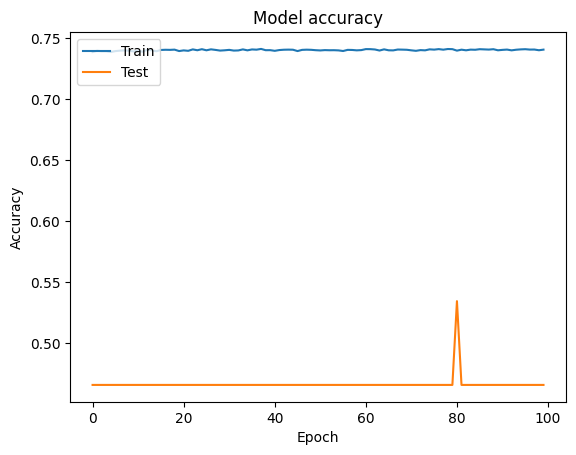

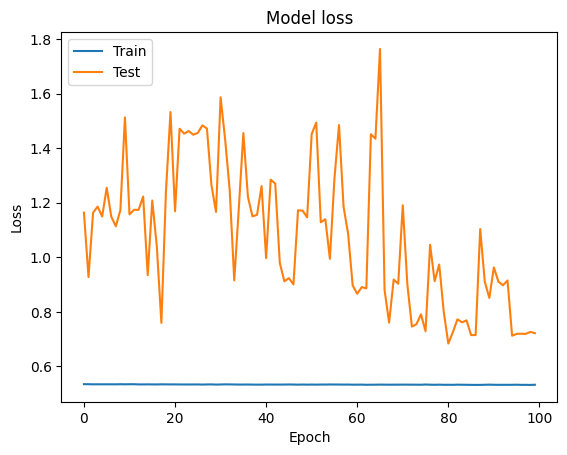

In [ ]:
import matplotlib.pyplot as plt

# Define the checkpoint file path
checkpoint_filepath = 'model_weights2.h5'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    period=5,
    verbose=1
)

# Train the model
history = model2.fit(X_train_scaled, y_train,
                     epochs=100,
                     validation_data=(X_test, y_test),
                     callbacks=[checkpoint_callback])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7275 - 343ms/epoch - 1ms/step
Loss: 0.5573437809944153, Accuracy: 0.7274635434150696


In [ ]:

# Export our model to HDF5 file
# save the model to an HDF5 file
model.save('AlphabetSoupCharity2.h5')

In [ ]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The accuracy of the model is 0.7266, which means it correctly predicts the outcome for 72.66% of the cases in the test set. While this is not a bad accuracy, whether this model is considered "good" or not depends on the specific context and requirements of the project.

For example, if the consequences of a false positive (predicting a success when it will actually fail) or a false negative (predicting a failure when it will actually succeed) are very different, then the accuracy alone may not be a sufficient metric to evaluate the model's performance.

It's important to also consider other metrics such as precision, recall, F1-score, and the confusion matrix to get a better understanding of the model's performance. Additionally, if the project requirements demand a higher accuracy, then further optimization may be necessary.

In [ ]:
#look at the confusion matrix to determine if a 72% is a good 

from sklearn.metrics import confusion_matrix
y = application_df['IS_SUCCESSFUL']
X = application_df.drop('IS_SUCCESSFUL',axis=1)

# Check the balance of our target values
label_counts = y.value_counts()
label_counts


1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [ ]:
# Make a prediction using the testing data
pred = model.predict(X_test)

268/268 [==============================] - 1s 2ms/step


In [ ]:
# predictions_df = pd.DataFrame({"Prediction": pred, "Actual": y_test})
# predictions_df.head()